In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = '/content/spambase.data'
data = pd.read_csv(url, header=None)


In [8]:
feature_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over',
                 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
                 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email',
                 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
                 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
                 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu',
                 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#' ,
                 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'Class'
]
data.columns = feature_names


In [9]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [14]:
print(data['Class'].value_counts())


Class
0    2788
1    1813
Name: count, dtype: int64


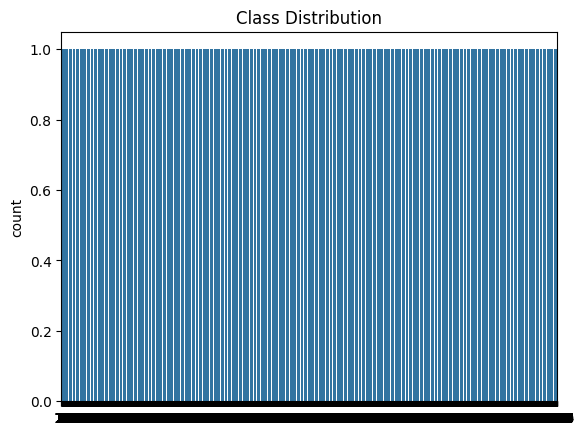

In [15]:
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

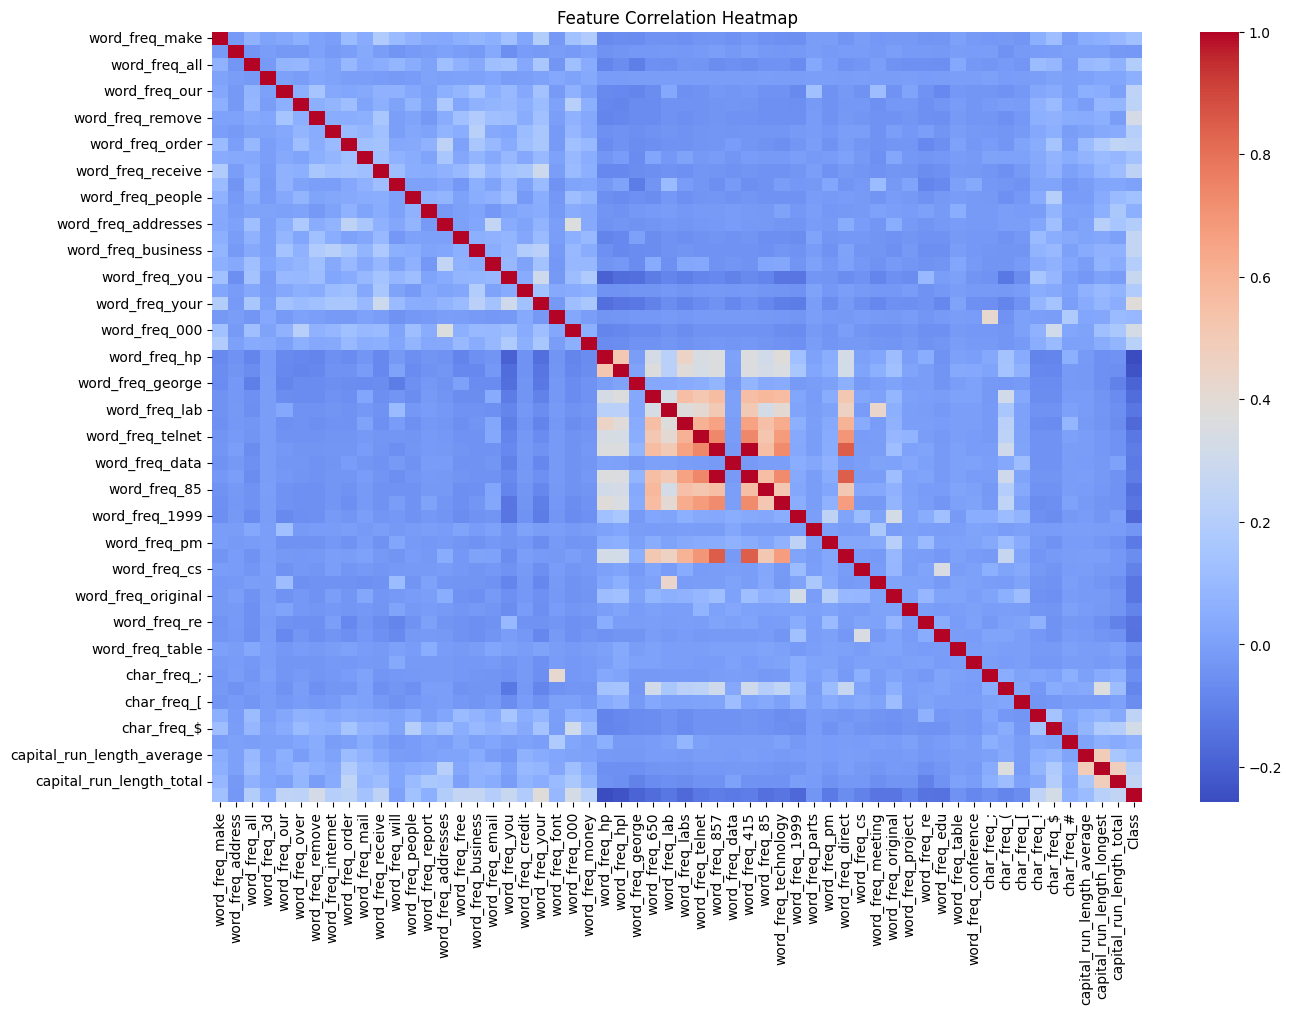

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression(max_iter=1000)

In [18]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9290369297610427
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381

Confusion Matrix:
 [[796  41]
 [ 57 487]]


In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

In [21]:
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [22]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'solver': 'newton-cg'}
Best Score: 0.9260869565217391


In [23]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

In [24]:
print("Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))


Accuracy (Best Model): 0.9275887038377987
Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.89      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Confusion Matrix (Best Model):
 [[795  42]
 [ 58 486]]
